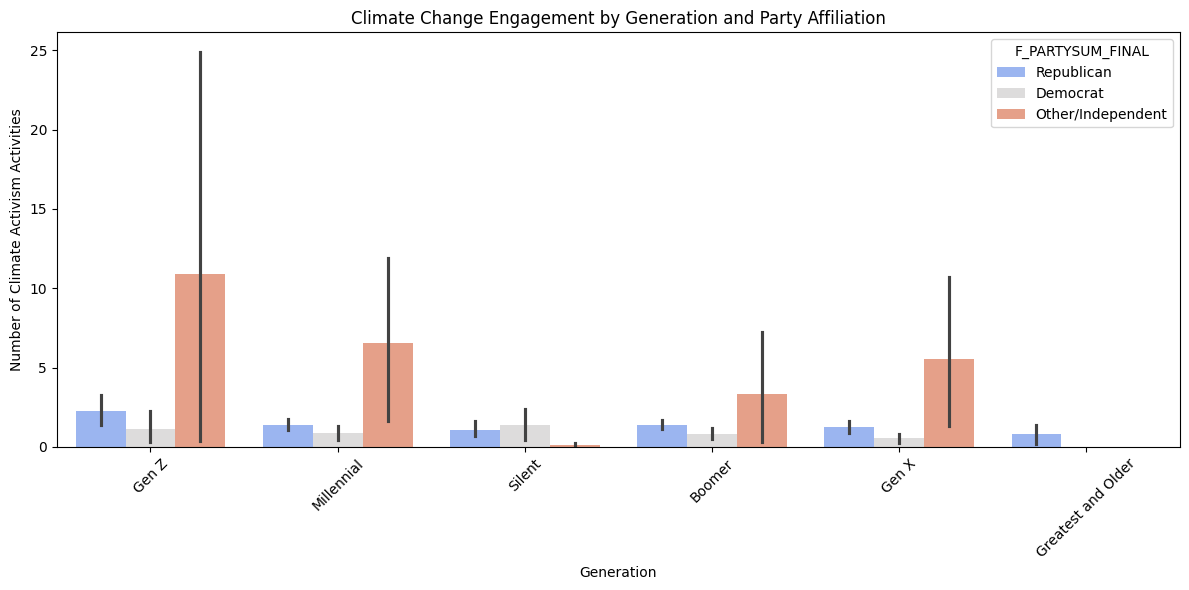

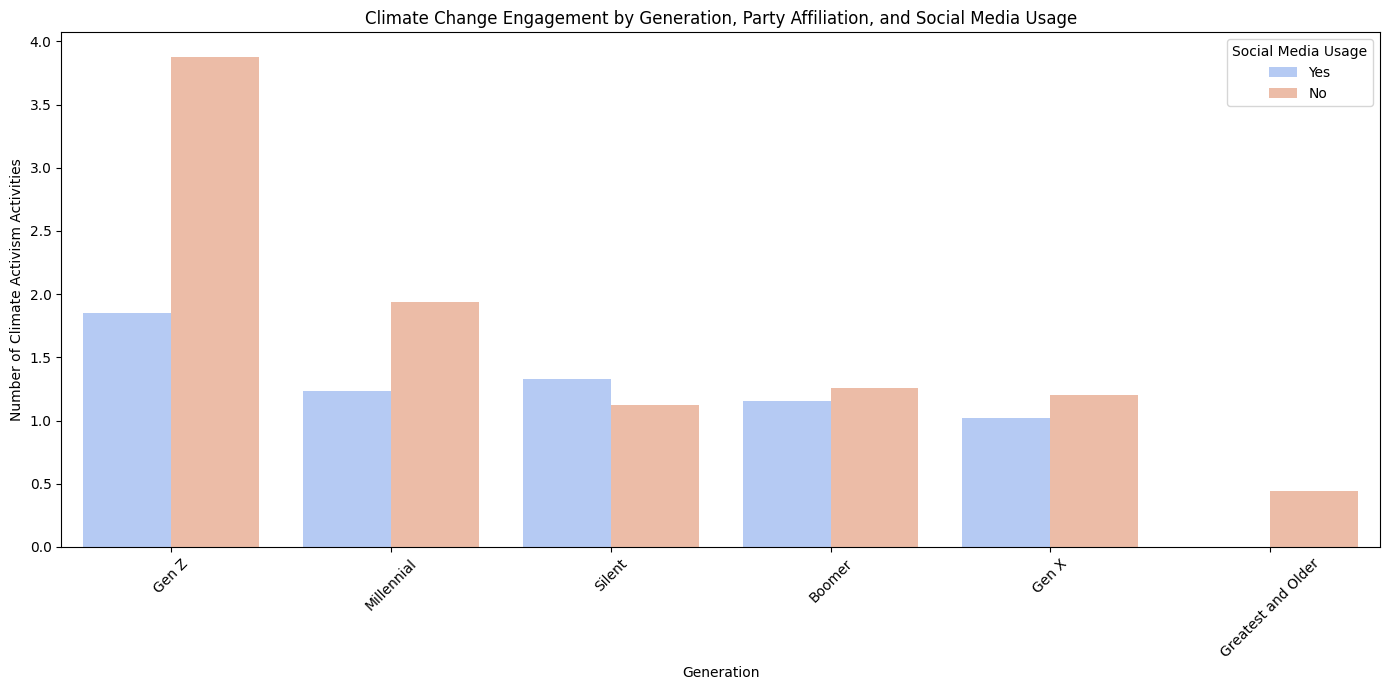

In [2]:
# Clare's code for pre-analysis subplots
import pyreadstat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Define the correct file path
file_path = "ATP W89.sav"


# Read the .sav file
df, meta = pyreadstat.read_sav(file_path)


# Clean and prepare data for analysis
generation_map = {1: 'Greatest and Older', 2: 'Silent', 3: 'Boomer',
                 4: 'Gen X', 5: 'Millennial', 6: 'Gen Z'}


party_map = {1: 'Democrat', 2: 'Republican', 9: 'Other/Independent'}


# Map categorical variables
df['F_GENERATIONS'] = df['F_GENERATIONS'].map(generation_map)
df['F_PARTYSUM_FINAL'] = df['F_PARTYSUM_FINAL'].map(party_map)


# Map social media usage to 'Yes'/'No' and remove "Refused"
df['Social Media Usage'] = df['SNSUSECMB_W89'].map({1: 'Yes', 2: 'No', 99: 'Refused'})
df_filtered = df.dropna(subset=['F_GENERATIONS', 'F_PARTYSUM_FINAL'])
df_filtered = df_filtered[df_filtered['Social Media Usage'] != 'Refused']  # Remove 'Refused' responses


# Barplot for climate activism by Generation and Party Affiliation
plt.figure(figsize=(12, 6))
sns.barplot(x='F_GENERATIONS', y='ENGACTCT_W89', hue='F_PARTYSUM_FINAL', data=df_filtered, palette='coolwarm')
plt.title('Climate Change Engagement by Generation and Party Affiliation')
plt.xlabel('Generation')
plt.ylabel('Number of Climate Activism Activities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Barplot for climate activism by Generation, Party Affiliation, and Social Media Usage
plt.figure(figsize=(14, 7))
sns.barplot(x='F_GENERATIONS', y='ENGACTCT_W89', hue='Social Media Usage',
           data=df_filtered, palette='coolwarm', errorbar=None)  # Fixed deprecation warning
plt.title('Climate Change Engagement by Generation, Party Affiliation, and Social Media Usage')
plt.xlabel('Generation')
plt.ylabel('Number of Climate Activism Activities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()